# Linear Programming in Python

### What is Linear Programming?

Linear Programming is the simplest mathematical optimization method. The goal is to achieve the best outcome, and by that we frequently mean either maximize the profit or minimize the cost. For a mathematical program to be linear, we need:
-	An **Objective Function** that is a linear expression
-	**Decision Variables** that are real variables
-	**Constrains** that are linear expressions

By linearity, we mean any expression of the following form,

$$
\begin{equation}
α_1 χ_1 + α_2 χ_2 + α_3 χ_3 + α_4 χ_4 + … α_n χ_n =, >=, <= b
\end{equation}
$$

${χ_i}$ : variable we want to calculate

In this notebook there going to be demonstrted two examples of linear programming. The first example is a simple example with 2 variables, that can be easily solved with graphical methods as well, and the second one, is a more complex example, with no graphical reprsentation. 

## Maximization Example

A company that produces amphoras and small sculptures uses pylon as raw material. The company wants to plan those to resources with goal to maximize its revenue. The availability of man power is 40 hour per day and the availability of pylon is 120kg per day. The selling price for an amphora is $40 while for a sculpture is $50.

| Item        | Labor (hours/ item)| Pylon (kg/item) |
| ------------- |---------------| -------|
| Amphoras    | 1 | 4 |
| Sculptures      | 2      |  3 |

**Variables**:

$x_1$ : number of sculptures

$x_2$ : number of amphoras

**Objective Function**:

$max(z) = 40x_1 + 50x_2$

**Constrains**:

$x_1 + 2x_2 <= 40$

$4x_1 + 3x_2 <= 120$

$x_1, x_2 >= 0$

### 1. Graphical Solution

In [1]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')
%matplotlib inline

First we will need to solve the linear equation to find the intersection of the two lines.

In [2]:
a = np.array([[2,1], [3,4]])
b = np.array([40,120])
x = np.linalg.solve(a, b)
print ('The coordinates are', (round(x[0]), round(x[1])))

The coordinates are (8.0, 24.0)


Lets plot our lines on to the Cartesian coordinate system.

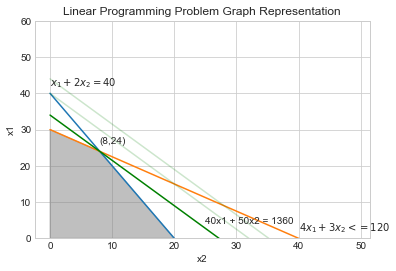

In [3]:
# Set a range for x-axis values
x = np.arange(0,50)

# The lines to plot
y1 = -2*x + 40
y2 = -(3.0/4)*x + 30
y3 = -(50.0/40)*x + 34
y4 = -(50.0/40)*x + 40
y5 = -(50.0/40)*x + 44

# Set y-limit, making neg y-values not show in plot
plt.ylim(0, 60)

# Plotting of lines
plt.plot(x, y1, 
         x, y2)
plt.plot(x, y3, 'g')
plt.plot(x, y4, 'g', alpha=0.2)
plt.plot(x, y5, 'g', alpha=0.2)

# Adding annotations
plt.text(0, 42, r'$x_1 + 2x_2 = 40$')
plt.text(40, 2, r'$4x_1 + 3x_2 <= 120$')
plt.text(8, 26, r'(8,24)')
plt.text(25, 4, r'40x1 + 50x2 = 1360')

# Creating the shaded area
x1 = [0,0,8,20]
x2 = [0,30,24,0]
plt.fill(x1, x2, color = 'grey', alpha=0.5)
plt.xlabel('x2')
plt.ylabel('x1')
plt.title('Linear Programming Problem Graph Representation')
plt.show()

The shaded area is the area of the possible solutions. In onder to figure out which variables maximize the objective function, and what is the the maximum profit that we can achieve, we are going to give different values for the profit and observe where it touchs with the shaded area. In the above plot, it is easily observed that the variables that maximize the objective function are,

$x_1$ = 24

$x_2$ = 8

and the revenue is $1360

### 2. Linear Programming Using pulp library

In [4]:
# Create the 'prob' variable that will host the problem's data
prob = LpProblem("Sculp Company",LpMaximize)

#### A. Creating the Variables

In [5]:
# the way to create the variables x1 and x2 is by using the LpVariable class
# x1=LpVariable("name", lower_bound, upper_bound, LpInteger/LpContinious)

# The 2 variables, number of Scuptures and number of Amphoras, 
# are created with a lower limit of zero
x1=LpVariable("sculptures",0,None,LpInteger)
x2=LpVariable("amphoras",0,None,LpInteger)

#### B. Objective Function

In [6]:
# The objective function is added to 'prob'
prob += 40*x1 + 50*x2, "Total Revenue"

#### C. Constrains

In [7]:
# The two constraints are added to 'prob'
prob += x1 + 2*x2 <= 40, "Labor"
prob += 4*x1 + 3*x2 <= 120, "Pylon"

In [8]:
prob

Sculp Company:
MAXIMIZE
50*amphoras + 40*sculptures + 0
SUBJECT TO
Labor: 2 amphoras + sculptures <= 40

Pylon: 3 amphoras + 4 sculptures <= 120

VARIABLES
0 <= amphoras Integer
0 <= sculptures Integer

In [9]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [10]:
# The status of the solution is printed 
print("Status of solution:", LpStatus[prob.status])

Status of solution: Optimal


In [11]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

amphoras = 8.0
sculptures = 24.0


In [12]:
# The optimised objective function value is printed to the screen
print("Total Revenue = ", value(prob.objective))

Total Cost of Ingredients per can =  1360.0


## References

http://www.kleerekoper.co.uk/2017/01/add-equation-to-seaborn-plot-and.html

https://pythonhosted.org/PuLP/CaseStudies/a_blending_problem.html

https://medium.com/italiandirectory-publishing/linear-programming-with-python-and-pulp-2413f09a8872

https://coral.ie.lehigh.edu/~ted/files/talks/PythonModeling.pdf